### E-Commerce data Sales Forecast

#### Warehouse optimization

Within this kernel we will analyse sales data of an UK online retailer. As storage area may be expensive and fast delivery on time is important to prevail over the competition we like to help the retailer by predicting daily amounts of sold products.

This is a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. 

#### 1. Import basic libs and data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pandas_profiling import ProfileReport

import warnings
warnings.filterwarnings('ignore')

plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
%pwd

'C:\\Users\\he\\jupyter_usw\\BA-showcases'

In [3]:
#https://www.kaggle.com/carrie1/ecommerce-data
df = pd.read_csv('./data/data_e_commerce.csv', encoding='latin')
df.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,12/1/2010 8:34,1.69,13047.0,United Kingdom


#### Exploratory Data Analysis (EDA)
Getting familiar with the data...

In [4]:
profile = ProfileReport(df, title='Pandas Profiling Report', explorative=True)
profile.to_notebook_iframe()

By hand

In [5]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


basic statistics; 
first problems identified:
- negative quantities?
- negative prices???
- huge numbers in Quantity?

Are there missing values?

In [6]:
missing_percentage = df.isnull().sum() / df.shape[0] * 100
missing_percentage

InvoiceNo       0.000000
StockCode       0.000000
Description     0.268311
Quantity        0.000000
InvoiceDate     0.000000
UnitPrice       0.000000
CustomerID     24.926694
Country         0.000000
dtype: float64

Almost 25 % of the are unknown! That's very strange. In addition we have 0.2 % of missing descriptions.

In [7]:
df[df.Description.isnull()].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,12/1/2010 11:52,0.0,NaN,United Kingdom
1970,536545,21134,NaN,1,12/1/2010 14:32,0.0,NaN,United Kingdom
1971,536546,22145,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1972,536547,37509,NaN,1,12/1/2010 14:33,0.0,NaN,United Kingdom
1987,536549,85226A,NaN,1,12/1/2010 14:34,0.0,NaN,United Kingdom


#### Data cleaning and vizualisations

bad description (lowercase, nan)

In [8]:
df.loc[df.Description.isnull()==False, "lowercase_descriptions"] = df.loc[
    df.Description.isnull()==False,"Description"
].apply(lambda l: l.lower())

df.lowercase_descriptions.dropna().apply(
    lambda l: np.where("nan" in l, True, False)
).value_counts()

False    539724
True        731
Name: lowercase_descriptions, dtype: int64

In [9]:
df.lowercase_descriptions.dropna().apply(
    lambda l: np.where("" == l, True, False)
).value_counts()

df.loc[df.lowercase_descriptions.isnull()==False, "lowercase_descriptions"] = df.loc[
    df.lowercase_descriptions.isnull()==False, "lowercase_descriptions"
].apply(lambda l: np.where("nan" in l, None, l))
df = df.loc[(df.CustomerID.isnull()==False) & (df.lowercase_descriptions.isnull()==False)].copy()

after this cleaning, are there any NaN values left?

In [10]:
df.isnull().sum().sum()

0

In [11]:
#!pip install plotly

plot the data geographically

In [12]:
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)

In [13]:
temp = df[['CustomerID', 'InvoiceNo', 'Country']].groupby(['CustomerID', 'InvoiceNo', 'Country']).count()
temp = temp.reset_index(drop = False)
countries = temp['Country'].value_counts()

In [14]:
data = dict(type='choropleth',
locations = countries.index,
locationmode = 'country names', z = countries,
text = countries.index, colorbar = {'title':'Order nb.'},
colorscale=[[0, 'rgb(224,255,255)'],
            [0.01, 'rgb(166,206,227)'], [0.02, 'rgb(31,120,180)'],
            [0.03, 'rgb(178,223,138)'], [0.05, 'rgb(51,160,44)'],
            [0.10, 'rgb(251,154,153)'], [0.20, 'rgb(255,255,0)'],
            [1, 'rgb(227,26,28)']],    
reversescale = False)
#_______________________
layout = dict(title='Number of orders per country',
geo = dict(showframe = True, projection={'type':'mercator'}))
#______________
choromap = go.Figure(data = [data], layout = layout)
iplot(choromap, validate=False)

Datetime and data period

In [15]:
df["InvoiceDate"] = pd.to_datetime(df.InvoiceDate, cache=True)

df.InvoiceDate.max() - df.InvoiceDate.min()

Timedelta('373 days 04:24:00')

invoice number and cancellations

In [16]:
df.InvoiceNo.nunique()

22186

In [17]:
df["IsCancelled"]=np.where(df.InvoiceNo.apply(lambda l: l[0]=="C"), True, False)
df.IsCancelled.value_counts() / df.shape[0] * 100

False    97.81007
True      2.18993
Name: IsCancelled, dtype: float64

In [18]:
df.loc[df.IsCancelled==True].describe()

,Quantity,UnitPrice,CustomerID
count,8896.000000,8896.000000,8896.000000
mean,-30.882981,18.862815,14991.575202
std,1170.746458,444.590459,1707.208018
min,-80995.000000,0.010000,12346.000000
25%,-6.000000,1.450000,13506.000000
50%,-2.000000,2.950000,14895.000000
75%,-1.000000,4.950000,16393.000000
max,-1.000000,38970.000000,18282.000000


cancelled orders have negative quantity but positive price; let's drop those

In [19]:
df = df.loc[df.IsCancelled==False].copy()
df = df.drop("IsCancelled", axis=1)

Have a look on the stock codes

Text(0, 0.5, 'Frequency')

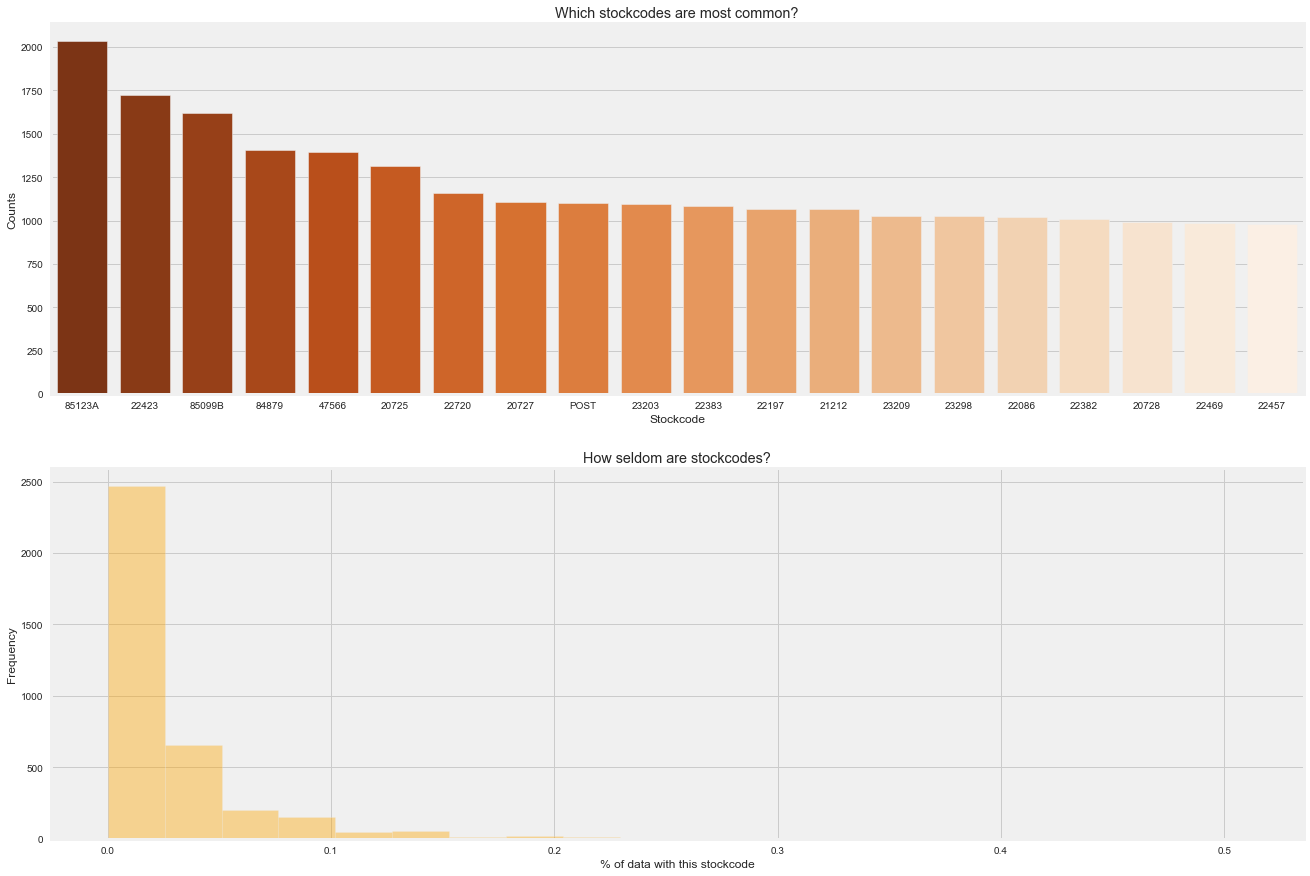

In [20]:
stockcode_counts = df.StockCode.value_counts().sort_values(ascending=False)
fig, ax = plt.subplots(2,1,figsize=(20,15))
sns.barplot(stockcode_counts.iloc[0:20].index,
            stockcode_counts.iloc[0:20].values,
            ax = ax[0], palette="Oranges_r")
ax[0].set_ylabel("Counts")
ax[0].set_xlabel("Stockcode")
ax[0].set_title("Which stockcodes are most common?");
sns.distplot(np.round(stockcode_counts/df.shape[0]*100,2),
             kde=False,
             bins=20,
             ax=ax[1], color="Orange")
ax[1].set_title("How seldom are stockcodes?")
ax[1].set_xlabel("% of data with this stockcode")
ax[1].set_ylabel("Frequency")

product descriptions

WHITE HANGING HEART T-LIGHT HOLDER


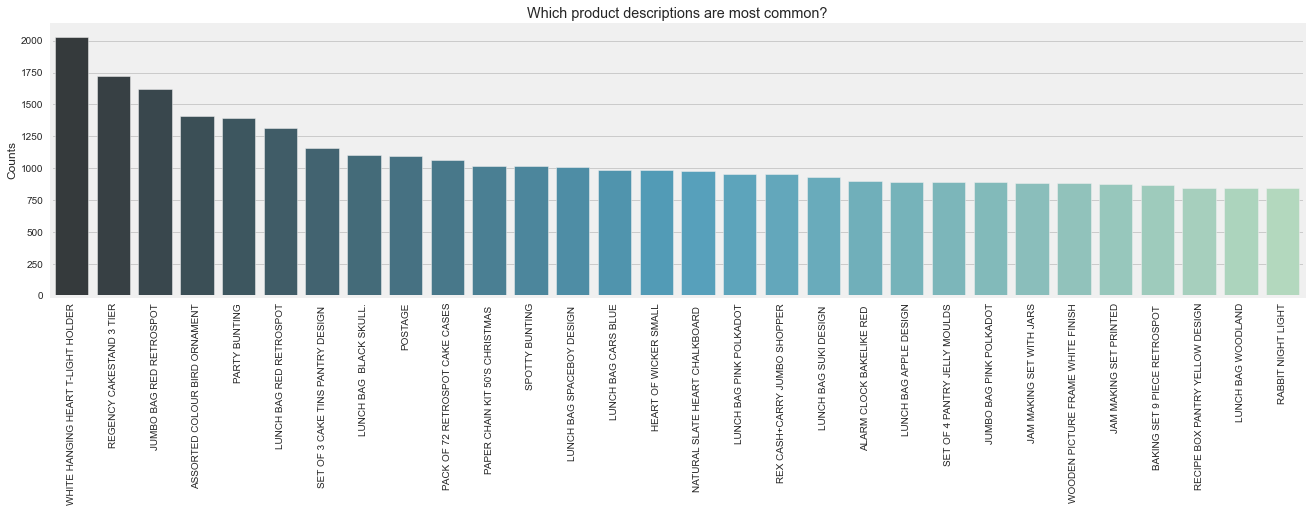

In [21]:
description_counts = df.Description.value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(description_counts.index, description_counts.values, palette="GnBu_d")
plt.ylabel("Counts")
plt.title("Which product descriptions are most common?");
plt.xticks(rotation=90);
print(description_counts.index[0])

lower chars in description?

In [22]:
def count_upper_chars(l):
    return sum(1 for c in l if c.isupper())

df["UpCharsInDescription"] = df.Description.apply(lambda l: count_upper_chars(l))

In [23]:
df.UpCharsInDescription.describe()

count    397327.000000
mean         22.609563
std           4.477934
min           1.000000
25%          20.000000
50%          23.000000
75%          26.000000
max          32.000000
Name: UpCharsInDescription, dtype: float64

In [24]:
df.loc[df.UpCharsInDescription <=5].Description.value_counts()

Manual                   290
Next Day Carriage         79
Bank Charges              12
High Resolution Image      3
Name: Description, dtype: int64

In [25]:
df = df.loc[df.UpCharsInDescription > 5].copy()

customers

In [26]:
df.CustomerID.nunique()

4335

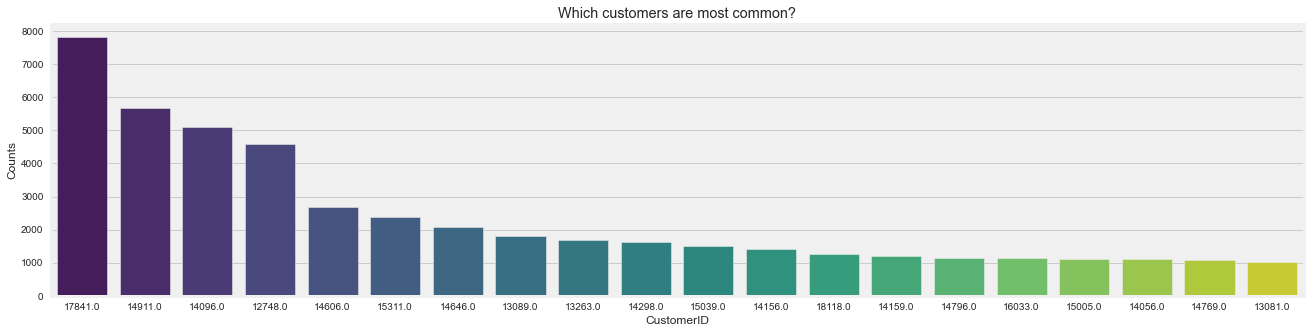

In [27]:
customer_counts = df.CustomerID.value_counts().sort_values(ascending=False).iloc[0:20] 
plt.figure(figsize=(20,5))
sns.barplot(customer_counts.index, customer_counts.values, order=customer_counts.index, palette="viridis")
plt.ylabel("Counts")
plt.xlabel("CustomerID")
plt.title("Which customers are most common?");

counties

In [28]:
df.Country.nunique()

37

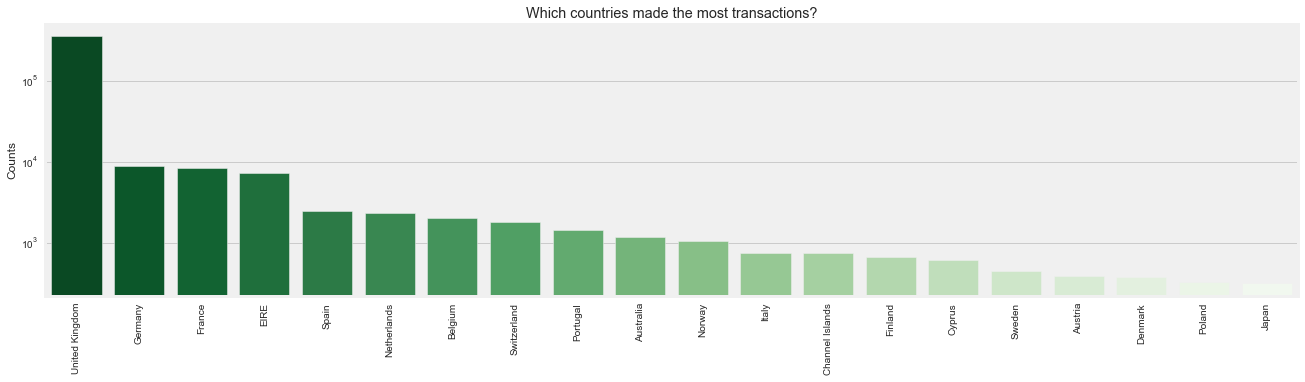

In [29]:
country_counts = df.Country.value_counts().sort_values(ascending=False).iloc[0:20]
plt.figure(figsize=(20,5))
sns.barplot(country_counts.index, country_counts.values, palette="Greens_r")
plt.ylabel("Counts")
plt.title("Which countries made the most transactions?");
plt.xticks(rotation=90);
plt.yscale("log")

In [30]:
df.loc[df.Country=="United Kingdom"].shape[0] / df.shape[0] * 100

89.03998810912398

price

In [31]:
df.UnitPrice.describe()

count    396943.000000
mean          2.992430
std          14.960835
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

In [32]:
df = df.loc[df.UnitPrice > 0].copy()

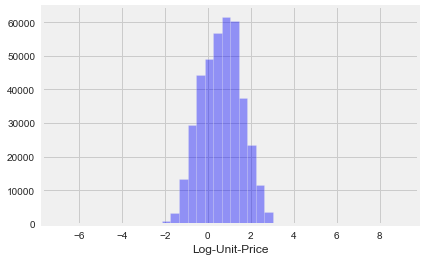

In [33]:
fig=sns.distplot(np.log(df.UnitPrice), bins=40, color="b", kde=False)
fig.set_xlabel("Log-Unit-Price");

In [34]:
df = df.loc[(df.UnitPrice > 0.1) & (df.UnitPrice < 100)].copy()

quantities

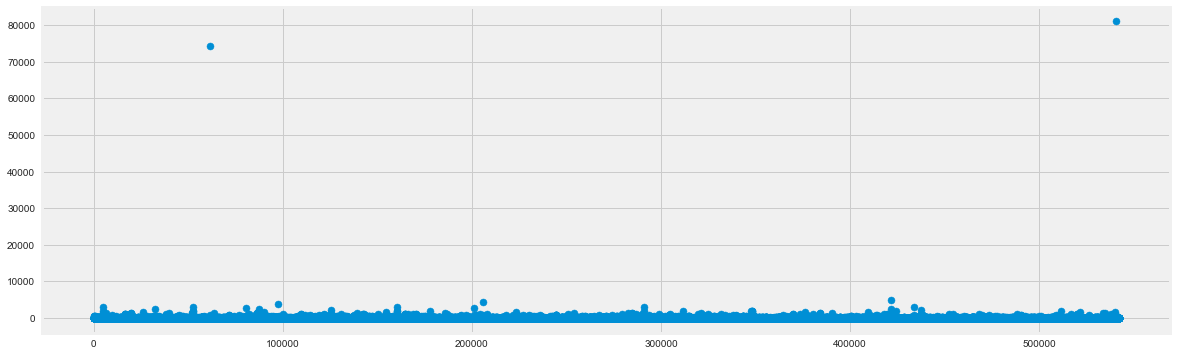

In [35]:
plt.figure(figsize=(18,6))
plt.scatter(x=df.index, y=df['Quantity'])
#df.plot.scatter(x='InvoiceNo',y='Quantity',c='DarkBlue')

In [36]:
df.Quantity.describe()

count    396483.000000
mean         12.904715
std         179.417292
min           1.000000
25%           2.000000
50%           6.000000
75%          12.000000
max       80995.000000
Name: Quantity, dtype: float64

In [37]:
np.quantile(df.Quantity, 0.95)

36.0

In [38]:
df = df.loc[df.Quantity < 72].copy()

add a new column for the revenue

In [39]:
df['Revenue'] = df['Quantity'] * df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,lowercase_descriptions,UpCharsInDescription,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,white hanging heart t-light holder,29,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,white metal lantern,17,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,26,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,30,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,red woolly hottie white heart.,25,20.34


In [40]:
df.Revenue.describe()

count    386103.000000
mean         16.110218
std          23.259725
min           0.120000
25%           4.350000
50%          10.500000
75%          17.850000
max         838.800000
Name: Revenue, dtype: float64

set invoice date as indexer

In [41]:
df = df.set_index('InvoiceDate')
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,lowercase_descriptions,UpCharsInDescription,Revenue
InvoiceDate,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,white hanging heart t-light holder,29,15.30
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,white metal lantern,17,20.34
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,26,22.00
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,30,20.34
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,red woolly hottie white heart.,25,20.34


Revenue over time

In [42]:
df_tr = df[['Revenue']]
df_tr.head()

,Revenue
InvoiceDate,
2010-12-01 08:26:00,15.30
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,22.00
2010-12-01 08:26:00,20.34
2010-12-01 08:26:00,20.34


<Figure size 1296x432 with 0 Axes>

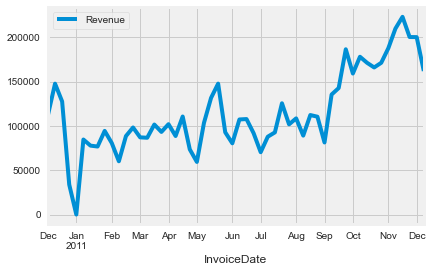

In [43]:
plt.figure(figsize=(18,6))
df_resample = df_tr.resample('W').sum()
df_resample.plot()

In [44]:
df_resample['12-2010':'01-2011']

,Revenue
InvoiceDate,
2010-12-05,112277.81
2010-12-12,147694.23
2010-12-19,127567.06
2010-12-26,33793.17
2011-01-02,0.00
2011-01-09,84617.89
2011-01-16,77734.50
2011-01-23,76732.18
2011-01-30,94348.83


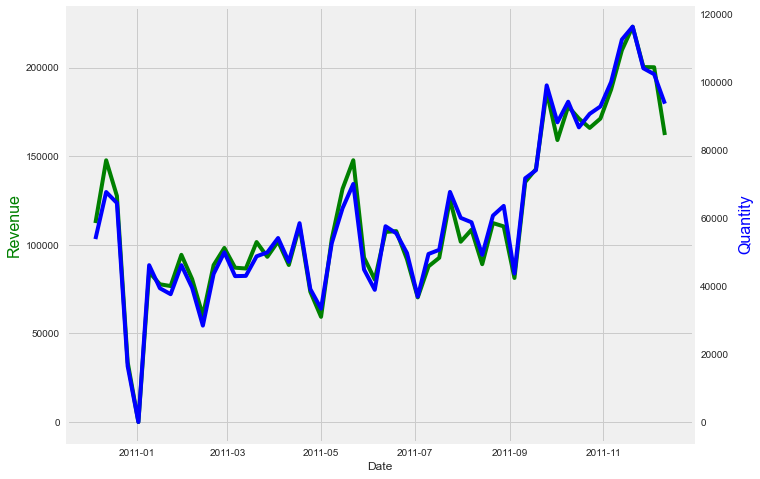

In [45]:
df_tq = df[['Quantity']]

fig, ax1 = plt.subplots(figsize=(10,8))

ax2 = ax1.twinx()
ax1.plot(df_tr.Revenue.resample('W').sum(), 'g-')
ax2.plot(df_tq.Quantity.resample('W').sum(), 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Revenue', color='g', size=16)
ax2.set_ylabel('Quantity', color='b', size=16)

plt.grid()
plt.show()

get some insights about the daily behaviour

In [46]:
df["Year"] = df.index.year
df["Quarter"] = df.index.quarter
df["Month"] = df.index.month
df["Week"] = df.index.week
df["Weekday"] = df.index.weekday
df["Day"] = df.index.day
df["Dayofyear"] = df.index.dayofyear
df["Date"] = pd.to_datetime(df[['Year', 'Month', 'Day']])

In [47]:
grouped_features = ["Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day",
                    "StockCode"]

daily_data = pd.DataFrame(df.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Revenue"] = df.groupby(grouped_features).Revenue.sum()
daily_data = daily_data.reset_index()
daily_data.head(5)

,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,StockCode,Quantity,Revenue
0,2010-12-01,2010,4,12,48,2,335,1,10002,60,51.00
1,2010-12-01,2010,4,12,48,2,335,1,10125,2,1.70
2,2010-12-01,2010,4,12,48,2,335,1,10133,5,4.25
3,2010-12-01,2010,4,12,48,2,335,1,15044B,1,2.95
4,2010-12-01,2010,4,12,48,2,335,1,15056BL,20,113.00


In [48]:
daily_data.loc[:, ["Quantity", "Revenue"]].describe()

,Quantity,Revenue
count,218226.000000,218226.000000
mean,14.903330,28.503494
std,19.136995,46.929961
min,1.000000,0.120000
25%,3.000000,6.600000
50%,8.000000,15.120000
75%,20.000000,30.600000
max,411.000000,1653.300000


In [49]:
low_quantity = daily_data.Quantity.quantile(0.01)
high_quantity = daily_data.Quantity.quantile(0.99)

low_revenue = daily_data.Revenue.quantile(0.01)
high_revenue = daily_data.Revenue.quantile(0.99)

daily_data = daily_data.loc[
    (daily_data.Quantity >= low_quantity) & (daily_data.Quantity <= high_quantity)]
daily_data = daily_data.loc[
    (daily_data.Revenue >= low_revenue) & (daily_data.Revenue <= high_revenue)]

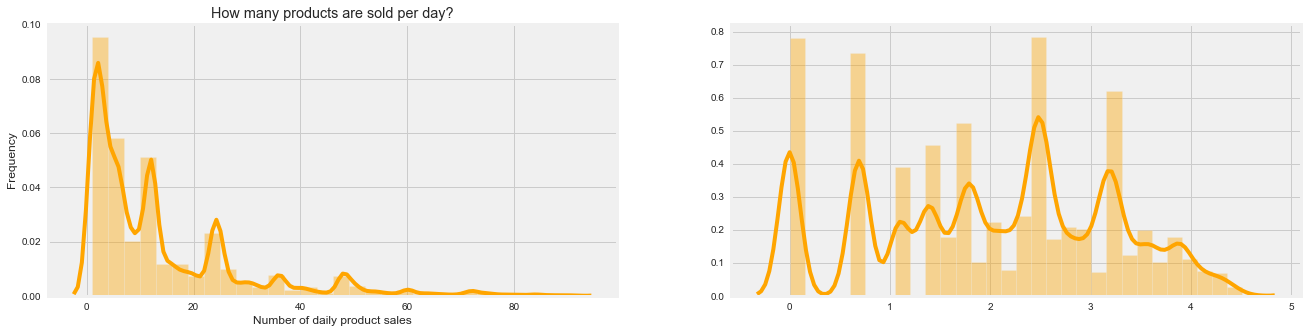

In [50]:
fig, ax = plt.subplots(1,2,figsize=(20,5))
sns.distplot(daily_data.Quantity.values, kde=True, ax=ax[0], color="Orange", bins=30);
sns.distplot(np.log(daily_data.Quantity.values), kde=True, ax=ax[1], color="Orange", bins=30);
ax[0].set_xlabel("Number of daily product sales");
ax[0].set_ylabel("Frequency");
ax[0].set_title("How many products are sold per day?");

#### Data preparation for modelling

In [51]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,lowercase_descriptions,UpCharsInDescription,Revenue,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
InvoiceDate,,,,,,,,,,,,,,,,,,
2010-12-01 08:26:00,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,17850.0,United Kingdom,white hanging heart t-light holder,29,15.30,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,71053,WHITE METAL LANTERN,6,3.39,17850.0,United Kingdom,white metal lantern,17,20.34,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,17850.0,United Kingdom,cream cupid hearts coat hanger,26,22.00,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,17850.0,United Kingdom,knitted union flag hot water bottle,30,20.34,2010,4,12,48,2,1,335,2010-12-01
2010-12-01 08:26:00,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,17850.0,United Kingdom,red woolly hottie white heart.,25,20.34,2010,4,12,48,2,1,335,2010-12-01


quantity per invoice feature

In [52]:
df_join = df.groupby('InvoiceNo')[['Quantity']].sum()

In [53]:
df_clean=df.copy()
df_clean['InvoiceDate'] = df.index
df_clean=df_clean.drop(columns=["CustomerID", "lowercase_descriptions", "UpCharsInDescription", 
                                "Date", "Year", "Quarter", "Month", "Week", "Weekday", "Dayofyear", "Day"])
df_clean = df_clean.merge(df_join, how='left', on='InvoiceNo')
df_clean = df_clean.rename(columns={'Quantity_x' : 'Quantity', 'Quantity_y' : 'QuantityInv'})
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceDate,QuantityInv
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40


In [54]:
df_clean.dtypes

InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
Country                object
Revenue               float64
InvoiceDate    datetime64[ns]
QuantityInv             int64
dtype: object

In [55]:
bins_q = pd.IntervalIndex.from_tuples([(0, 2), (2, 5), (5, 8), (8, 11), (11, 14), (15, 5000)])
df_clean['QuantityRange'] = pd.cut(df_clean['Quantity'], bins=bins_q)
bins_p = pd.IntervalIndex.from_tuples([(0, 1), (1, 2), (2, 3), (3, 4), (4, 20)])
df_clean['PriceRange'] = pd.cut(df_clean['UnitPrice'], bins=bins_p)
df_clean.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceDate,QuantityInv,QuantityRange,PriceRange
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2.55,United Kingdom,15.30,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
1,536365,71053,WHITE METAL LANTERN,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2.75,United Kingdom,22.00,2010-12-01 08:26:00,40,"(5, 8]","(2, 3]"
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,3.39,United Kingdom,20.34,2010-12-01 08:26:00,40,"(5, 8]","(3, 4]"


new features: season, day

In [56]:
df_clean['Month'] = df_clean['InvoiceDate'].dt.month
bins_m = pd.IntervalIndex.from_tuples([(0,3),(3,6),(6,9),(9,12)])
df_clean['DateRange'] = pd.cut(df_clean['Month'], bins=bins_m, labels=['q1','q2','q3','q4'])

#df_clean['WDay'] = df_clean['InvoiceDate'].dt.weekday #Monday=0
#bins_d = pd.IntervalIndex.from_tuples([(0,1),(1,2),(2,3),(3,4),(4,5),(5,6),(6,7)])
##df_clean['DateRange'] = pd.cut(df_clean['WDay'], bins=bins_d, labels=['Mon','Tue','Wed','Thu','Fri','Sat','Sun'])

df_clean.tail()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,Country,Revenue,InvoiceDate,QuantityInv,QuantityRange,PriceRange,Month,DateRange
386098,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,0.85,France,10.20,2011-12-09 12:50:00,105,"(11, 14]","(0, 1]",12,"(9, 12]"
386099,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2.10,France,12.60,2011-12-09 12:50:00,105,"(5, 8]","(2, 3]",12,"(9, 12]"
386100,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,4.15,France,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
386101,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,4.15,France,16.60,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"
386102,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,4.95,France,14.85,2011-12-09 12:50:00,105,"(2, 5]","(4, 20]",12,"(9, 12]"


lastly: split into UK and non-UK

In [57]:
df_uk = df_clean[df_clean['Country'] == 'United Kingdom']
df_abroad = df_clean[df_clean['Country'] != 'United Kingdom']

extracting features and use one-hot-encoding

In [58]:
df_uk_model = df_uk[['Revenue', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange']]
#df_uk_model = df_uk[['Revenue', 'QuantityInv', 'QuantityRange', 'PriceRange', 'DateRange', 'WDay']]
df_uk_model.head()

,Revenue,QuantityInv,QuantityRange,PriceRange,DateRange
0,15.30,40,"(5, 8]","(2, 3]","(9, 12]"
1,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
2,22.00,40,"(5, 8]","(2, 3]","(9, 12]"
3,20.34,40,"(5, 8]","(3, 4]","(9, 12]"
4,20.34,40,"(5, 8]","(3, 4]","(9, 12]"


In [59]:
df_data = df_uk_model.copy()
df_data = pd.get_dummies(df_data, columns=['QuantityRange'], prefix='qr')
df_data = pd.get_dummies(df_data, columns=['PriceRange'], prefix='pr')
df_data = pd.get_dummies(df_data, columns=['DateRange'], prefix='dr')
df_data.head()

,Revenue,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,40,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,40,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


scaling

In [60]:
#Standardize features by removing the mean and scaling to unit variance
from sklearn.preprocessing import scale
df_data['QuantityInv'] = scale(df_data['QuantityInv'])
df_data.head()

,Revenue,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
0,15.30,-0.768366,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
1,20.34,-0.768366,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
2,22.00,-0.768366,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
3,20.34,-0.768366,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1
4,20.34,-0.768366,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1


train - test split

In [61]:
y = df_data['Revenue']
X = df_data.drop(columns=['Revenue'])

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

#### ML models for regression of our prediction quantity 'Revenue'

In [63]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from timeit import default_timer as timer

# Linear Regression
fit_intercepts = [True, False]
param_grid_linear = dict(fit_intercept=fit_intercepts)
linear_model = LinearRegression()

# Decision Tree
min_tree_splits = range(2,3)
min_tree_leaves = range(2,3)
param_grid_tree = dict(min_samples_split=min_tree_splits,
                       min_samples_leaf=min_tree_leaves)
tree_model = DecisionTreeRegressor()

# Random Forest
estimators_space = [100]
min_sample_splits = range(2,4)
min_sample_leaves = range(2,3)
param_grid_forest = dict(min_samples_split=min_sample_splits,
                       min_samples_leaf=min_sample_leaves,
                       n_estimators=estimators_space)
forest_model = RandomForestRegressor()

# AdaBoost
estimators_space = [50, 100]
learning_rate_space = [0.5, 0.1]
param_grid_adaboost = dict(learning_rate=learning_rate_space,
                       n_estimators=estimators_space)
adaboost_model = AdaBoostRegressor()

cv = 5

models_to_test = ['LinearRegression','DecisionTreeRegressor','RandomForest','AdaBoostRegressor']
regression_dict = dict(LinearRegression=linear_model,
                       DecisionTreeRegressor=tree_model,
                       RandomForest=forest_model,
                       AdaBoostRegressor=adaboost_model)
param_grid_dict = dict(LinearRegression=param_grid_linear,
                       DecisionTreeRegressor=param_grid_tree,
                       RandomForest=param_grid_forest, 
                       AdaBoostRegressor=param_grid_adaboost)

score_dict = {}
params_dict = {}
mae_dict = {}
mse_dict = {}
r2_dict = {}
best_est_dict = {}
time_dict={}

for model in models_to_test:
    start = timer()
    regressor = GridSearchCV(regression_dict[model], param_grid_dict[model], cv=cv, n_jobs=-1)

    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    # Print the tuned parameters and score
    print(" === Start report for regressor {} ===".format(model))
    score_dict[model] = regressor.best_score_
    print("Tuned Parameters: {}:".format(regressor.best_params_)) 
    params_dict = regressor.best_params_
    print("Best score is {}:".format(regressor.best_score_))

    # Compute metrics
    mae_dict[model] = mean_absolute_error(y_test, y_pred)
    print("MAE for {}:".format(model))
    print(mean_absolute_error(y_test, y_pred))
    mse_dict[model] = mean_squared_error(y_test, y_pred)
    print("MSE for {}:".format(model))
    print(mean_squared_error(y_test, y_pred))
    r2_dict[model] = r2_score(y_test, y_pred)
    print("R2 score for {}:".format(model))
    print(r2_score(y_test, y_pred))
    print()
    end = timer()
    time_dict[model]=round((end - start),3)
    print('Time consumption [s]: ', round((end - start),3))
    print()
    print(" === End of report for regressor {} === \n\n".format(model))

    # Add best estimator to the dict
    best_est_dict[model] = regressor.best_estimator_

 === Start report for regressor LinearRegression ===
Tuned Parameters: {'fit_intercept': True}:
Best score is 0.4609021106963322:
MAE for LinearRegression:
7.702243084195098
MSE for LinearRegression:
237.04366526666027
R2 score for LinearRegression:
0.47314705315789474

Time consumption [s]:  1.185

 === End of report for regressor LinearRegression === 


 === Start report for regressor DecisionTreeRegressor ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2}:
Best score is 0.7482913939786547:
MAE for DecisionTreeRegressor:
3.8711550461114377
MSE for DecisionTreeRegressor:
107.14288960067276
R2 score for DecisionTreeRegressor:
0.7618643507904272

Time consumption [s]:  2.101

 === End of report for regressor DecisionTreeRegressor === 


 === Start report for regressor RandomForest ===
Tuned Parameters: {'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}:
Best score is 0.7778338261338171:
MAE for RandomForest:
3.81086516695518
MSE for RandomForest:
98.

Feature: QuantityInv, Score: 0.10448
Feature: qr_(0, 2], Score: 0.05289
Feature: qr_(2, 5], Score: 0.04863
Feature: qr_(5, 8], Score: 0.01844
Feature: qr_(8, 11], Score: 0.00076
Feature: qr_(11, 14], Score: 0.00651
Feature: qr_(15, 5000], Score: 0.18090
Feature: pr_(0, 1], Score: 0.12852
Feature: pr_(1, 2], Score: 0.04943
Feature: pr_(2, 3], Score: 0.01466
Feature: pr_(3, 4], Score: 0.03567
Feature: pr_(4, 20], Score: 0.33959
Feature: dr_(0, 3], Score: 0.00415
Feature: dr_(3, 6], Score: 0.00437
Feature: dr_(6, 9], Score: 0.00535
Feature: dr_(9, 12], Score: 0.00566


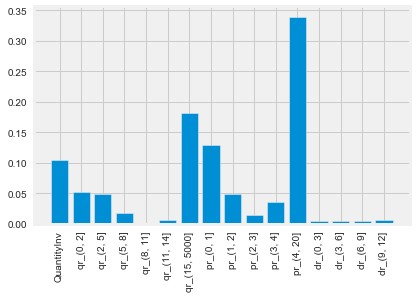

In [67]:
importance = best_est_dict['RandomForest'].feature_importances_
for i,v in enumerate(importance):
     print('Feature: %s, Score: %.5f' % (X.columns.values.tolist()[i],v))
# plot feature importance
plt.bar(X.columns.values.tolist(), importance)
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Regressor Comparison')

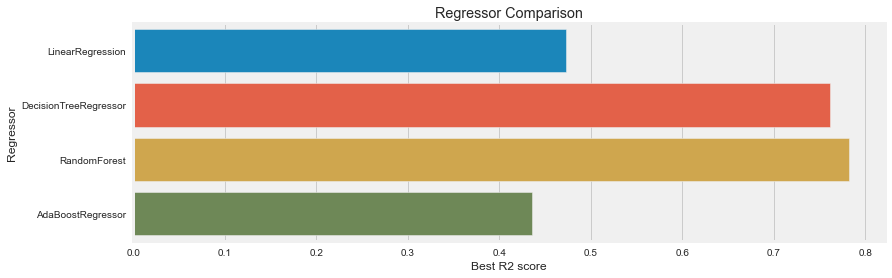

In [68]:
# Creating summary report for score
summary_cols = ['Best Score']
summary = pd.DataFrame.from_dict(r2_dict, orient='index')
summary.index.name = 'Regressor'
summary.columns = summary_cols
summary = summary.reset_index()

# Visualizing results
plt.figure(figsize=(12,4))
sns.barplot(x='Best Score', y='Regressor', data=summary)
plt.xlabel('Best R2 score')
plt.title('Regressor Comparison')

Text(0.5, 1.0, 'Regressor Comparison')

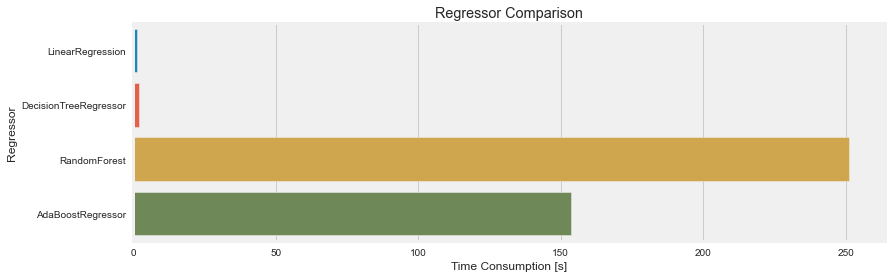

In [69]:
# Creating summary report for time consumption
summary_cols_t = ['Time Consumption']
summary_t = pd.DataFrame.from_dict(time_dict, orient='index')
summary_t.index.name = 'Regressor'
summary_t.columns = summary_cols_t
summary_t = summary_t.reset_index()

plt.figure(figsize=(12,4))
sns.barplot(x='Time Consumption', y='Regressor', data=summary_t)
plt.xlabel('Time Consumption [s]')
plt.title('Regressor Comparison')

make a prediction

In [70]:
testcase=pd.DataFrame(df_data.iloc[12345]).T
testcase

,Revenue,QuantityInv,"qr_(0, 2]","qr_(2, 5]","qr_(5, 8]","qr_(8, 11]","qr_(11, 14]","qr_(15, 5000]","pr_(0, 1]","pr_(1, 2]","pr_(2, 3]","pr_(3, 4]","pr_(4, 20]","dr_(0, 3]","dr_(3, 6]","dr_(6, 9]","dr_(9, 12]"
13390,8.75,-0.184064,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [71]:
testcase_x=np.array(testcase.drop(columns=['Revenue']))
testcase_x=sc.transform(testcase_x)
testcase_x

array([[-0.18465399, -0.75562542, -0.46620722,  2.6597156 , -0.24707522,
        -0.41054189, -0.38855115, -0.54686802,  1.55233184, -0.50364843,
        -0.26102935, -0.51389311, -0.45105479, -0.49464475, -0.54898915,
         1.21768678]])

In [72]:
pred=[]
for i in best_est_dict.values():
    pred.append([i,i.predict(testcase_x)[0]])
    
pred

[[LinearRegression(), 12.519899110820198],
 [DecisionTreeRegressor(min_samples_leaf=2), 7.726666666666667],
 [RandomForestRegressor(min_samples_leaf=2), 7.731124259213008],
 [AdaBoostRegressor(learning_rate=0.1), 13.428462120040715]]